<img src="https://www.politecnicos.com.br/img/075.jpg" alt="Grupo Turing" height="420" width="420">

# Turing Academy 3: Análise e Limpeza de dados - Code Along

Autor: Felipe Azank dos Santos

No mundo real de ciência de dados, nem todas as informações contidas dentro de um dataset foram devidamente coletadas e, portanto, muitas vezes as nossas predições e conclusões sobre aquele fato podem ser distorcidas, caso não haja uma preparação dos dados. Portanto, essa aula tem como objetivo, ensinar o básico sobre limpeza de dados e análises que podemos fazer a partir de um Dataset, fazendo isso com um exemplo.

## Definições

### Análise de Dados:
A análise de dados é uma das habilidades principais da ciência de dados. Para começar a criar modelos úteis, precisamos entender o conjunto de dados que temos. Você muito provavelmente nunca saberá sobre a totalidade dos dados com que está trabalhando e sempre precisará explorar as variáveis em profundidade antes de começar a construir um modelo ou fazer outra coisa com os dados. A visualização eficaz de dados é a ferramenta mais importante em seu arsenal para fazer isso e, portanto, uma habilidade crítica para você dominar.

OBS: A análise de dados não serve apenas para auxiliar na criação de modelos de Machine Learning. Muitas vezes, tirar insights significativos dos dados já é o suficiente para resolver problemas de diversas esferas, como problemas da área acadêmica, empresarial, hospitalar e etc. O que torna esse conhecimento útil para muitos profissionais.

Ferramentas mais utilizadas: Pandas, Matplotlib, Seaborn.

### Limpeza de Dados:
Contudo, para trabalhar com dados, seja para análise ou criação de modelos, é necessário sabermos limpá-los. Infelizmente, essa é a parte que mais consome nosso tempo e é a menos recompensadora, embora seja fundamentalmente necessária. Geralmente, a limpeza e a visualização de dados andam simultaneamente, com a limpeza

Ferramentas mais utilizadas: Pandas, PySpark

# Nosso Dataset - primeios passos na análise de dados
Vamos agora ver o nosso Dataset e nosso problema. O primeiro passo no processo de análise e limpeza é se familiarizar com o dataset: descobrir de onde veio, do que se trata, o que representa suas colunas, em quem ele votou no segundo turno, e etc. Esse trabalho nem sempre é tão trivial, mas bem necessário, não tem como você falar sobre seu dataset se você não sabe o que ele tem para te falar.


Descrição do dataset utilizado: default of credit card clients Data Set, esse Data Set contém dados de usuários de cartão de crédito em Taiwan


**Features:**

* **ID:** identificação do cliente.
* **LIMIT_BAL:** limite de crédito em dólares.
* **SEX:** sexo.
* **EDUCATION:** grau de escolaridade.
* **MARRIAGE:** estado civil.
* **AGE:** idade em anos.
* **PAY_0, PAY_2-6:** status de pagamento dos últimos 6 meses.

> * **-1:** pago completamente.
> * **1:** um mês de atraso.
> * **2:** dois meses de atraso.
> * Sucessivamente até:
> * **9:** nove meses ou mais de atraso.

* **BILL_AMT1-6:** valor em dólares das faturas nos últimos 6 meses.
* **PAY_AMT1-6:** valor em dólares pago nos últimos 6 meses.

**Target:**

* **default.payment.next.month:** indica se a fatura do próximo mês será ou não paga.

**Obs:** "últimos seis meses" representa o período de abril de 2005 até setembro de 2005.

Link do dataset: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# Importando ferramentas e Dados
Vamos agora começar a codar! Primeiro, vamos começar importar as principais bibliotecas de análise e limpeza de dados com python

In [ ]:
#chamando nossos 4 cavaleiros do apocalipse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [ ]:
df = pd.read_csv("train.csv")    # Dataset que será utilizado, futuramente, para treinar o modelo.
df.set_index("ID", inplace=True) # Define a coluna ID como índice (evita que essa interfira na predição).

# Observações iniciais
coisas que prontamente você deve fazer com seus dados

In [ ]:
df.head(15)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
27552,330000.0,male,high school,married,53.0,0.0,0.0,0.0,0.0,0.0,...,152341.0,149998.0,-2.0,3856.0,3926.0,NaN,3000.0,2.0,0.0,0
4163,200000.0,male,NaN,married,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,1
21029,20000.0,male,university,married,39.0,0.0,0.0,0.0,0.0,0.0,...,18130.0,18491.0,18893.0,1200.0,10000.0,NaN,662.0,700.0,1000.0,0
27331,500000.0,male,university,married,40.0,-1.0,-1.0,0.0,0.0,0.0,...,12072.0,9832.0,984.0,4682.0,5000.0,5000.0,5000.0,1000.0,600.0,0
28028,240000.0,female,university,married,32.0,1.0,-2.0,-2.0,-1.0,NaN,...,262.0,0.0,1389.0,0.0,0.0,262.0,0.0,1389.0,0.0,0
4007,10000.0,male,high school,single,46.0,2.0,2.0,3.0,3.0,3.0,...,1050.0,1050.0,1050.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6531,230000.0,male,high school,married,61.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1
20518,100000.0,male,university,single,25.0,0.0,0.0,0.0,0.0,0.0,...,89539.0,91258.0,93343.0,4000.0,4000.0,4100.0,4000.0,3241.0,5000.0,0
17578,240000.0,female,graduate school,single,NaN,0.0,0.0,NaN,-2.0,-2.0,...,-15.0,-15.0,1185.0,0.0,0.0,0.0,0.0,1200.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 27552 to 23041
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   11587 non-null  float64
 1   SEX                         11565 non-null  object 
 2   EDUCATION                   11487 non-null  object 
 3   MARRIAGE                    11605 non-null  object 
 4   AGE                         11576 non-null  float64
 5   PAY_0                       11600 non-null  float64
 6   PAY_2                       11593 non-null  float64
 7   PAY_3                       11565 non-null  float64
 8   PAY_4                       11595 non-null  float64
 9   PAY_5                       11577 non-null  float64
 10  PAY_6                       11600 non-null  float64
 11  BILL_AMT1                   11554 non-null  float64
 12  BILL_AMT2                   11587 non-null  float64
 13  BILL_AMT3                  

Observações:
* 12000 entries, muitas colunas com dados faltantes (e não são poucos)
* 3 features com Dtype = object, isso significa que se tratam de dados categóricos

# Categóricos
Vamos agora investigar superficialmente os dados categóricos. Uma forma de realizar isso seria utilizando o método describe, mas apenas incluindo as colúnas categóricas

In [ ]:
df.describe(include=['object'])

,SEX,EDUCATION,MARRIAGE
count,11565,11487,11605
unique,4,4,6
top,female,university,single
freq,6911,5419,6096


Algo de errado não está certo, na coluna "sexo" (não gênero) deveríamos ter apenas duas classificações, assim como na coluna "marriage", portanto, vamos ver as categorias de cada coluna categórica

In [ ]:
print("SEX:", df.SEX.unique())
print("EDUCATION:", df.EDUCATION.unique())
print("MARRIAGE:", df.MARRIAGE.unique())

SEX: ['male' 'female' 'm' nan 'f']
EDUCATION: ['high school' nan 'university' 'graduate school' 'others']
MARRIAGE: ['married' 'single' 'others' 'MARRIED' nan 'SINGLE' 'OTHERS']


## Trocando os dados categóricos

In [ ]:
# Substitui "male" e "m" por 1.
df["SEX"].replace("m", "male", inplace=True)

# Substitui "female" e "f" por 2.
df["SEX"].replace("f", "female", inplace=True)

# Substitui "MARRIED" por "married"
df["MARRIAGE"].replace("MARRIED", "married", inplace=True)

# Substitui "SINGLE" por "single"
df["MARRIAGE"].replace("SINGLE", "single", inplace=True)

# Substitui "OTHERS" por "others"
df["MARRIAGE"].replace("OTHERS", "others", inplace=True)

In [ ]:
print("SEX:", df.SEX.unique())
print("EDUCATION:", df.EDUCATION.unique())
print("MARRIAGE:", df.MARRIAGE.unique())

SEX: ['male' 'female' nan]
EDUCATION: ['high school' nan 'university' 'graduate school' 'others']
MARRIAGE: ['married' 'single' 'others' nan]


## Plotando alguns gráficos categóricos

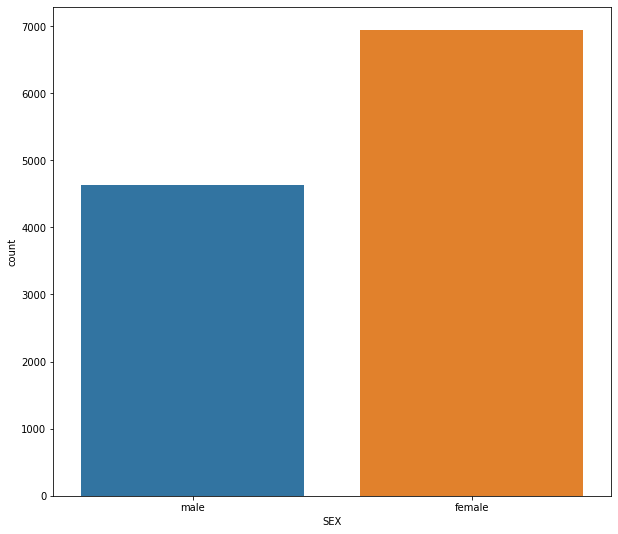

In [ ]:
plt.figure(figsize=(10,9))
sns.countplot(df['SEX'])
plt.show()

Podemos ver que, em nosso dataset, o número de pessoas do sexo feminino é bem maior que o número de pessoas do sexo masculino. Por quê isso ocorre? Tente descobrir vendo a procedência do dataset no link do começo.

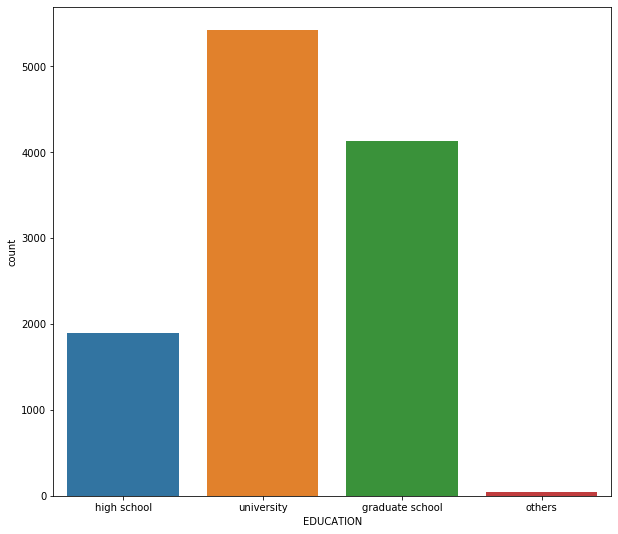

In [ ]:
plt.figure(figsize=(10,9))
sns.countplot(df['EDUCATION'])
plt.show()

Podemos perceber que o número de usuários de cartão de crédito é maior em pessoas da formação universitária do que do ensino médio, uma observação possívelmente útil caso esteja estudando sobre o tipo de clientes do seu negócio.

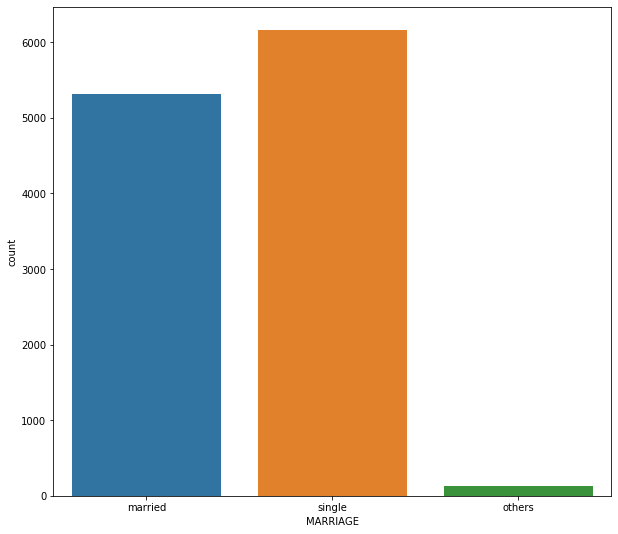

In [ ]:
plt.figure(figsize=(10,9))
sns.countplot(df['MARRIAGE'])
plt.show()

Não diz muito, talvez podemos tirar alguma conclusão quando cruzarmos com os dados numéricos

## Lidando com os dados faltantes de Marriage e Education
Como podemos ver nos gráficos acima, as duas últimas colunas apresentam uma categoria "others", isso não é interessante quando se trata de treinar um modelo. Tendo isso em vista, precisamos substituir ou excluir esses dados "especiais".

Para a categoria "Marriage", podemos ver pelo código abaixo que possui 185 entradas com este valor. Vamos substituí-los pela **moda**, ou seja, o valor que mais aparece (no caso, "single").

In [ ]:
len(df[df['MARRIAGE'] == 'others'])

128

In [ ]:
#substituindo pela moda
df['MARRIAGE'].replace("others", df['MARRIAGE'].mode()[0], inplace=True)

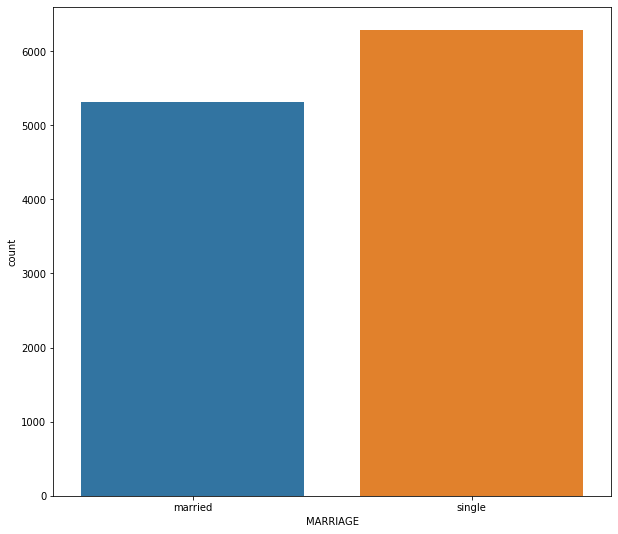

In [ ]:
plt.figure(figsize=(10,9))
sns.countplot(df['MARRIAGE'])
plt.show()

Agora, para a categoria "Education", por se tratarem de somente 76 entradas com "others", podemos simplesmente remover essas entradas:

In [ ]:
len(df[df['EDUCATION'] == 'others'])

41

In [ ]:

indexOthers = df[ df['EDUCATION'] == 'others'].index
df.drop(indexOthers , inplace=True)

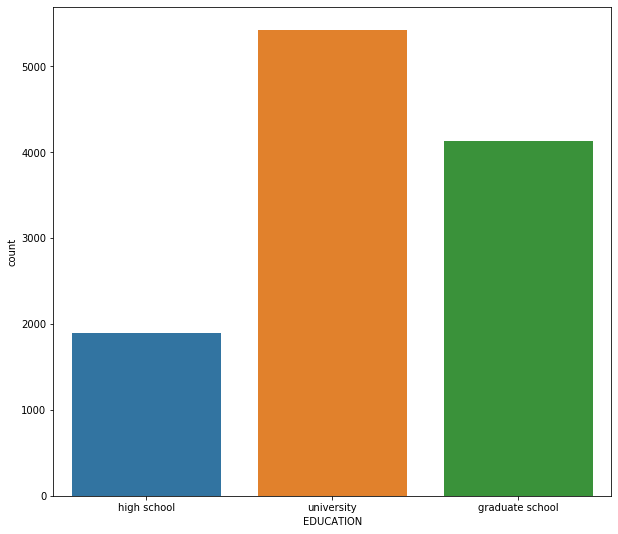

In [ ]:
plt.figure(figsize=(10,9))
sns.countplot(df['EDUCATION'])
plt.show()

# Numéricos


Agora, para os dados numéricos, vamos fazer o mesmo processo feito anteriormente, contudo, com algumas mudanças no código e na maneira de vizualizá-los.

In [ ]:
# utilizando o método describe
df.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,11549.000000,1.153600e+04,11561.000000,11553.000000,11526.000000,11554.000000,11537.000000,11560.000000,11513.000000,11547.000000,...,11547.000000,11495.000000,11551.000000,11534.000000,1.153700e+04,11566.000000,11548.000000,11530.000000,11431.000000,11959.000000
mean,165717.897653,-8.313518e+02,-0.007006,-0.129144,-0.158338,-0.215596,-0.263327,-0.285813,52229.010510,49819.570538,...,43937.317572,40551.338234,39320.427322,5593.025837,5.995475e+03,5207.826993,4814.204797,4607.980919,5284.950923,0.221758
std,129543.758868,9.310520e+04,1.125223,1.187471,1.185305,1.175500,1.144774,1.163942,75180.007674,71932.878063,...,65536.848781,61194.516398,60185.222379,15080.481251,2.599292e+04,17145.545033,16142.650517,14094.466277,18951.977953,0.415446
min,10000.000000,-1.000000e+07,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-9802.000000,-18618.000000,...,-170000.000000,-61372.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,2.800000e+01,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3773.000000,3357.000000,...,2393.500000,1654.000000,1260.500000,1000.000000,9.000000e+02,390.000000,300.000000,264.000000,142.000000,0.000000
50%,140000.000000,3.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22777.000000,21726.000000,...,19143.000000,18091.000000,17376.000000,2132.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,4.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68251.000000,64381.500000,...,55502.500000,50520.000000,49580.000000,5032.750000,5.000000e+03,4430.500000,4009.750000,4000.000000,4000.000000,0.000000
max,800000.000000,1.800000e+02,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,746814.000000,743970.000000,...,706864.000000,547880.000000,527711.000000,493358.000000,1.684259e+06,508229.000000,528897.000000,426529.000000,528666.000000,1.000000


In [ ]:
# utilizando ".T", podemos ver completamente as features em datasets com muitas colunas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,11549.0,165717.897653,129543.758868,10000.0,50000.0,140000.0,240000.00,800000.0
AGE,11536.0,-831.351768,93105.196359,-10000000.0,28.0,34.0,41.00,180.0
PAY_0,11561.0,-0.007006,1.125223,-2.0,-1.0,0.0,0.00,8.0
PAY_2,11553.0,-0.129144,1.187471,-2.0,-1.0,0.0,0.00,7.0
PAY_3,11526.0,-0.158338,1.185305,-2.0,-1.0,0.0,0.00,8.0
PAY_4,11554.0,-0.215596,1.175500,-2.0,-1.0,0.0,0.00,8.0
PAY_5,11537.0,-0.263327,1.144774,-2.0,-1.0,0.0,0.00,8.0
PAY_6,11560.0,-0.285813,1.163942,-2.0,-1.0,0.0,0.00,8.0
BILL_AMT1,11513.0,52229.010510,75180.007674,-9802.0,3773.0,22777.0,68251.00,746814.0
BILL_AMT2,11547.0,49819.570538,71932.878063,-18618.0,3357.0,21726.0,64381.50,743970.0


Logo de cara, podemos ver que algo está muito errado em nossa coluna "idade", que apresenta média de -831, idade mínima de -10000000 e máxima de 180. Para melhor entendermos, vamos vizualizar a coluna:

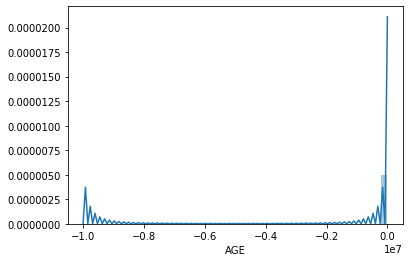

In [ ]:
sns.distplot(df['AGE'].dropna())

Podemos ver que o fato de uma pessoa apresentar uma idade tão negativa, chega a distorcer o gráfico de idades, vamos então excluir valores menores que zero e maiores que 110

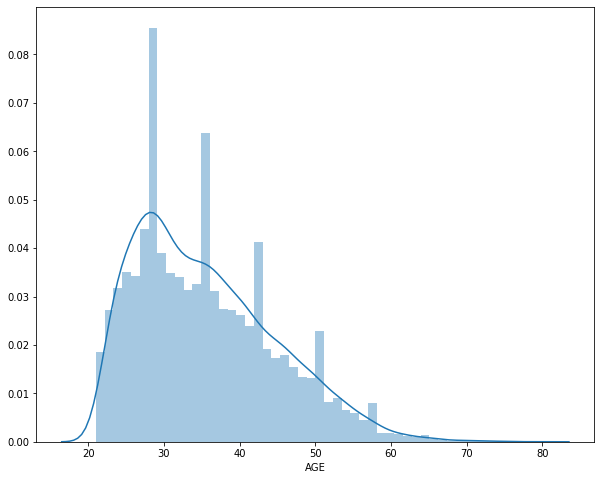

In [ ]:
df = df[df['AGE'] > 0]
df = df[df['AGE'] <= 110]
# ou
df = df.query('0<AGE<110')

#vamos plotar novamente o gráfico e ver o que mudou
plt.figure(figsize=(10,8))
sns.distplot(df['AGE'].dropna())
plt.show()

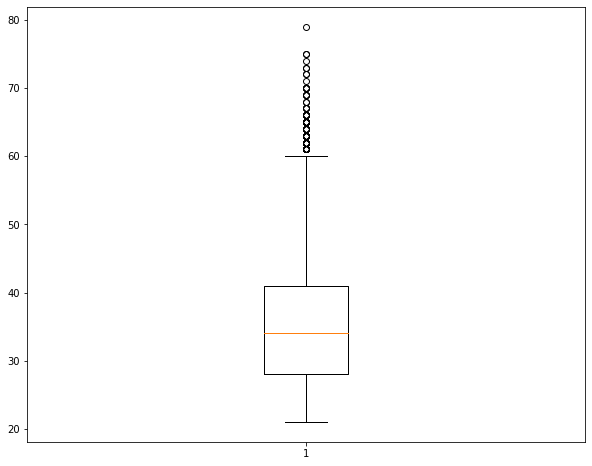

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(df['AGE'])
plt.show()

Com o boxplot, podemos identificar alguns outliers (pontos fora do boxplot) contudo, não deveríamos retirá-los, uma vez que essa idades são até cabíveis para nosso dataset.

## Limite de crédito
Uma vez que as outras colunas não parecem tão estranhas em sua descrição, vamos agora plotar cada uma delas, começando pelo limite de crédito   

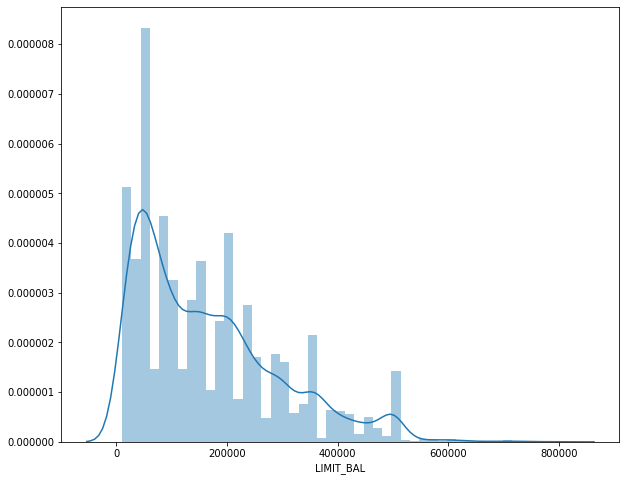

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['LIMIT_BAL'].dropna())
plt.show()

Assim como a coluna de idade, há um grande número de ocorrências de casos espaçados, isso provavelmente se deve pelo método que a esquisa ocorreu, na qual os dados recebidos foram "arredondados" em uma faixa de valores.

## Vendo demais colunas
Uma forma interessante de procurar rápidamente se há alguma relação importante nos seus dados, é usando a função "pairplot" do seaborn, na qual cria-se uma matriz de gráficos, em que a diagonal principal representa a distribuição em barras dos dados, e os demais representam o gráfico "scatter". Isso nos permite identificar se há alguma relação gritante nos nossos dados, além de identificar alguma esquisitice na sua distribuição.  

<Figure size 1296x720 with 0 Axes>

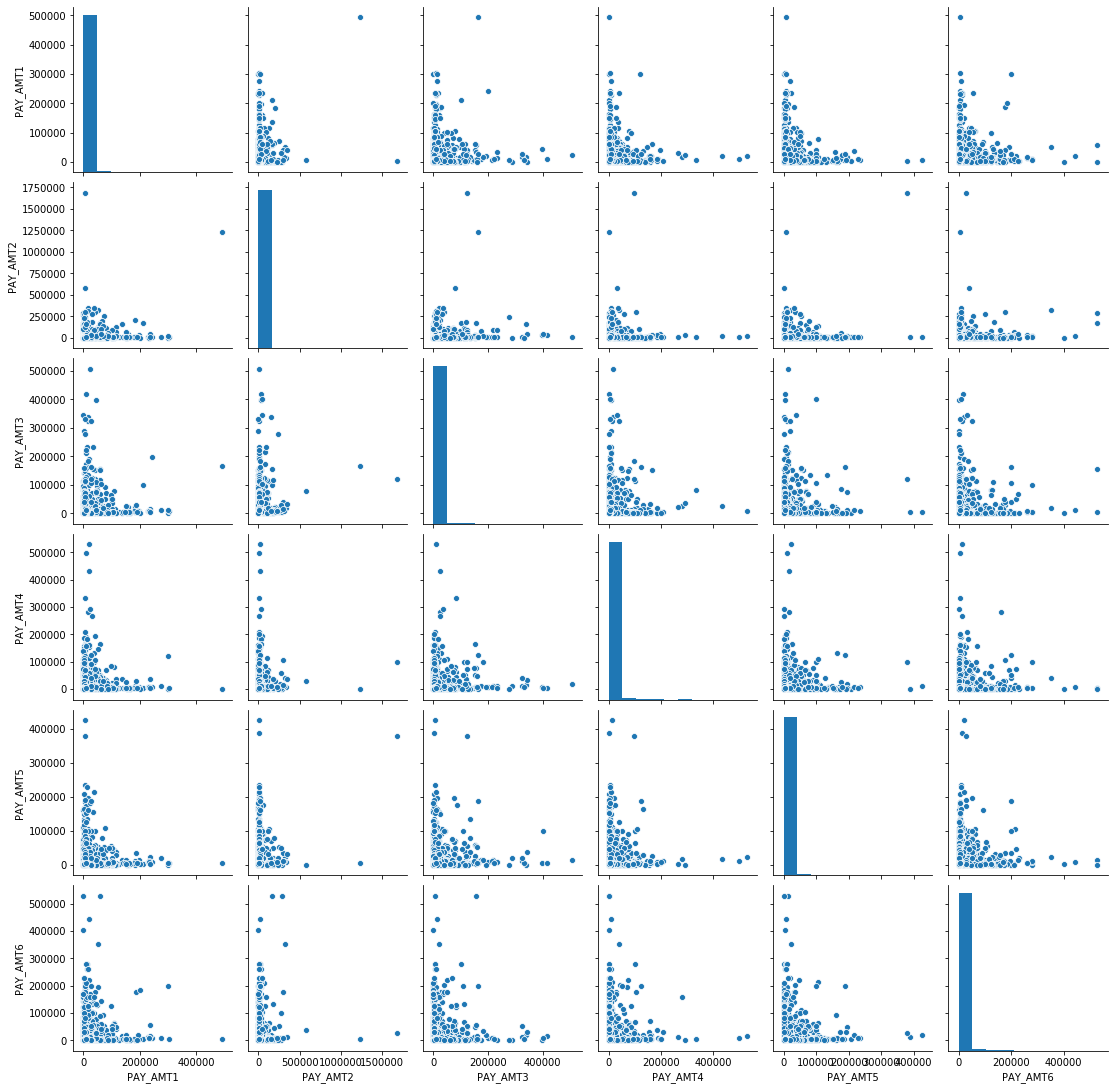

In [ ]:
# Pairplot das colunas PAY_AMT
plt.figure(figsize=(18,10))
sns.pairplot(df[['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])
plt.show()

Podemos perceber que a gigantesca maioria dessas colunas estão praticamente "zeradas" o que nos leva a acreditar que analisar essas colunas não são tão essenciais para a criação do nosso modelo.

<Figure size 1296x720 with 0 Axes>

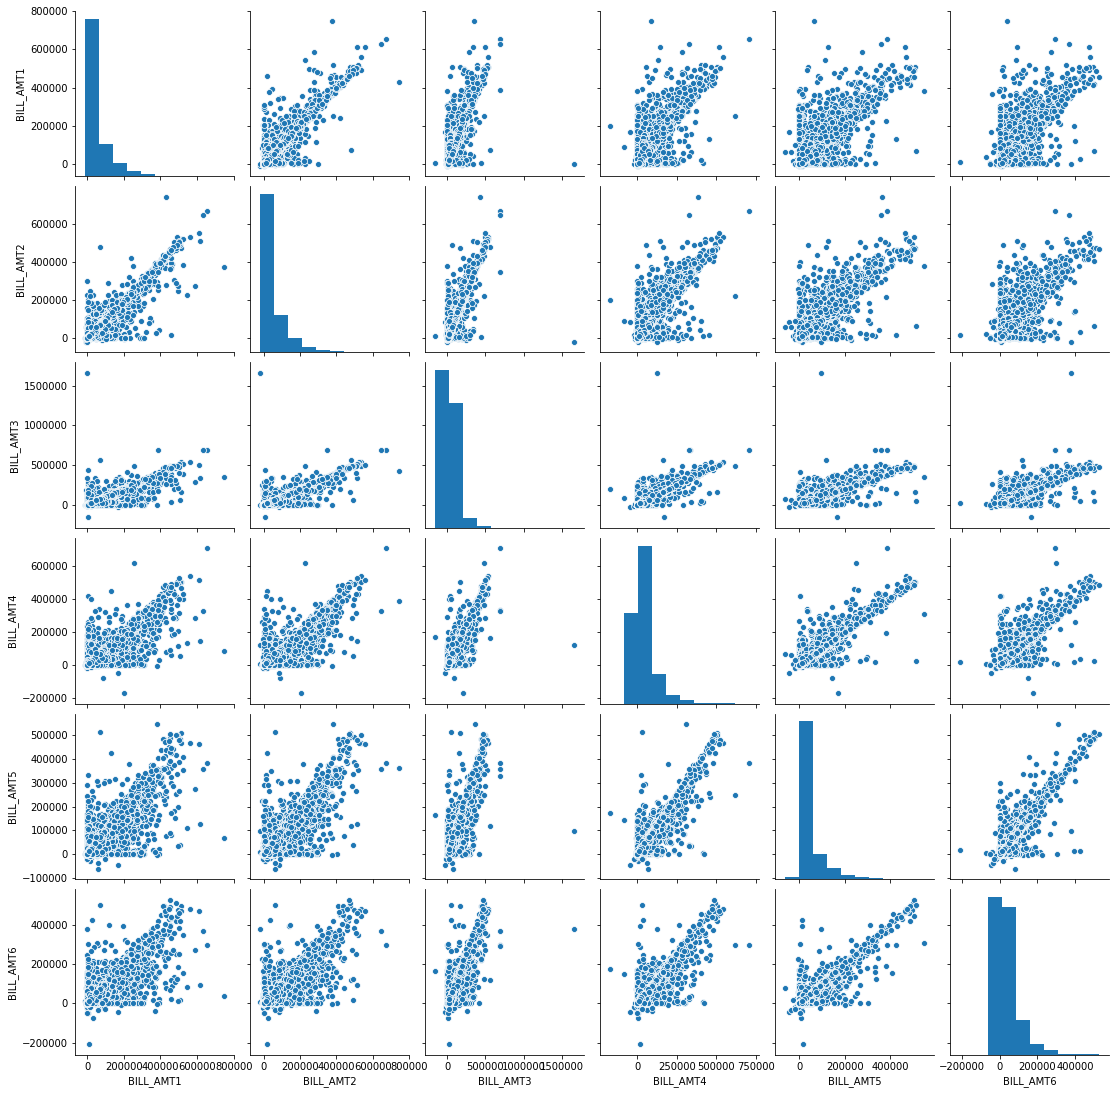

In [ ]:
# Pairplot das colunas BILL_AMT
plt.figure(figsize=(18,10))
sns.pairplot(df[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
plt.show()

As colunas "BILL_AMT", diferentemente das colunas anteriores, apresentam uma distribuição mais significativa, principalmente quando relacionamos umas às outras. O fato de muitos scatter plots acima evidênciarem uma correlação positiva entre as variáveis nos permite confirmar que, em linhas gerais, pessoas com faturas altas em um mês, tendem a apresentarem faturas altas no próximo, assim como pessoas com faturas pequenas, costumam apresentar faturas pequenas nos próximos meses.

<Figure size 1296x720 with 0 Axes>

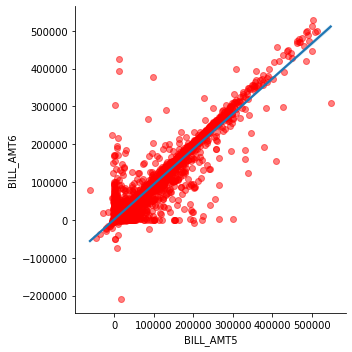

In [ ]:
plt.figure(figsize=(18,10))
sns.lmplot(x ='BILL_AMT5', y ='BILL_AMT6', data = df,scatter_kws={'alpha':0.5,'color':'red'} )
plt.show()

També podemos explorar a correlação entre colunas por meio de uma Matriz de Correlação, algo que vocês já viram

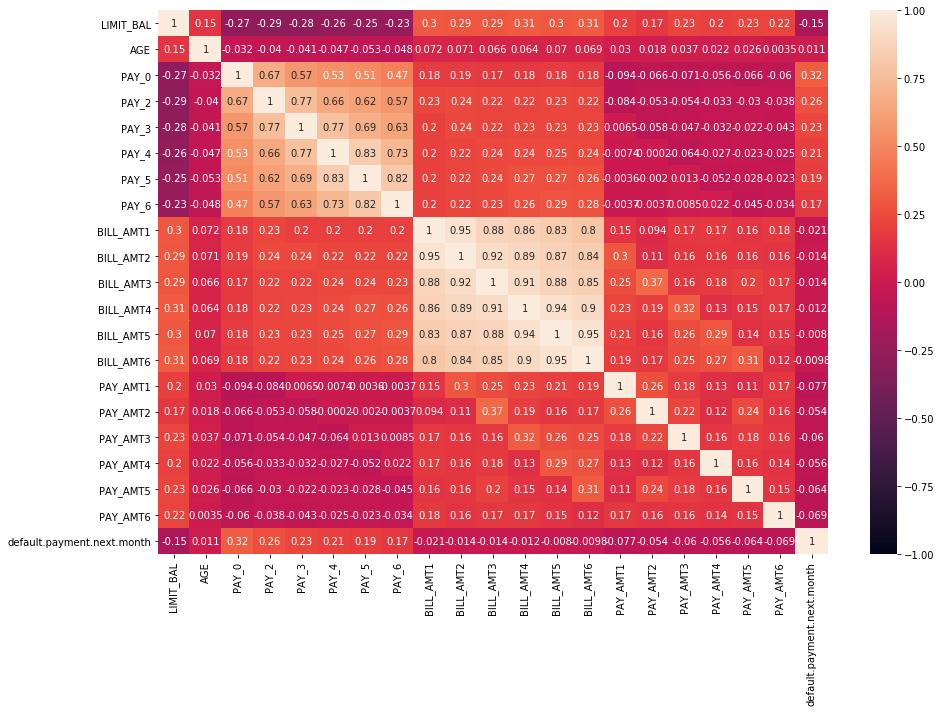

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

# Relacionando mais colunas (com dados categóricos)
Vamos agora procurar relações entre variáveis, relacionando-as a dados categórios

## Scatter plot com distinção categórica

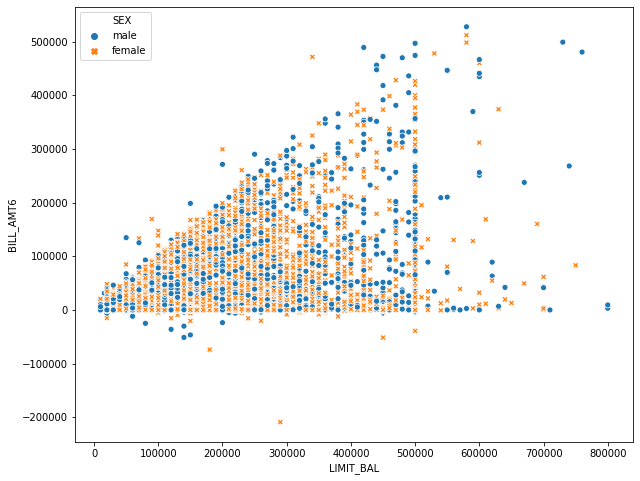

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(df["LIMIT_BAL"], df["BILL_AMT6"], hue=df["SEX"], style=df['SEX'])
plt.show()

Não conseguimos tirar uma conclusão tão fudamentada com base no sexo, porém podemos notar um outlier, em que uma pessoa do sexo feminino apresenta um valor em fatura de -200000, o que é bem diferente do resto.

In [ ]:
df = df[df['BILL_AMT6'] > -30000]

## Swarmplots

<Figure size 1080x720 with 0 Axes>

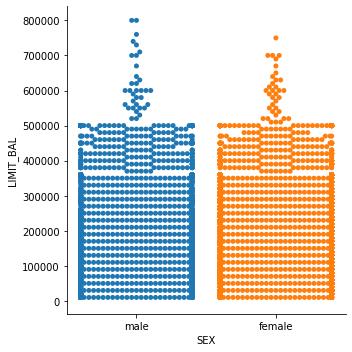

In [ ]:
plt.figure(figsize=(15,10))
sns.catplot(x="SEX", y="LIMIT_BAL", kind="swarm", data=df)
plt.show()

Infelizmente, o swarmplot não nos providenciou nada que nos faz distinguir o limite de crédito entre os diferentes sexos.

<Figure size 1080x720 with 0 Axes>

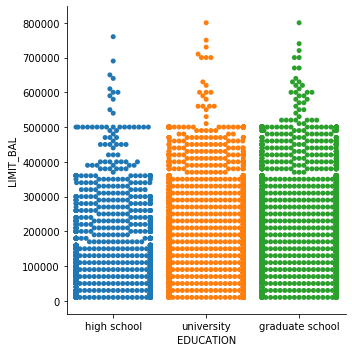

In [ ]:
plt.figure(figsize=(15,10))
sns.catplot(x="EDUCATION", y="LIMIT_BAL", kind="swarm", data=df)
plt.show()

Já comparando entre níveis educacionais, podemos ver que pessoas sem nível superior (apenas high school) apresentam um limite de crédito menor em comparação com as pessoas com esse nível.

## Comparando a diferença de nivel educacional usando FaceGrid

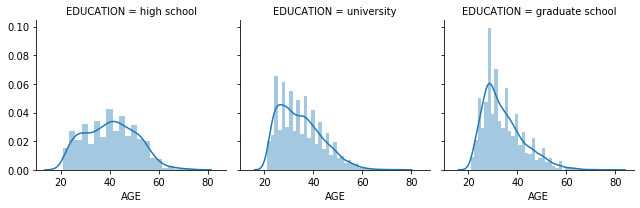

In [ ]:
M = sns.FacetGrid(df, col="EDUCATION")
M.map(sns.distplot, "AGE")
plt.show()

Esse Facegrid nos mostra o quão diferente é a distribuição das idades de pessoas com diferentes níveis educacionais

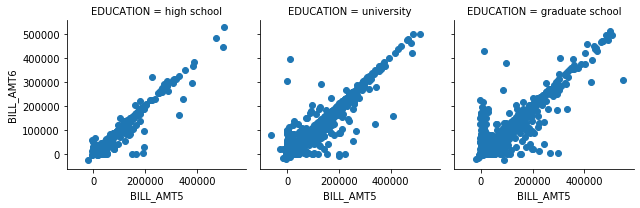

In [ ]:
M = sns.FacetGrid(df, col="EDUCATION")
M.map(plt.scatter,"BILL_AMT5","BILL_AMT6")

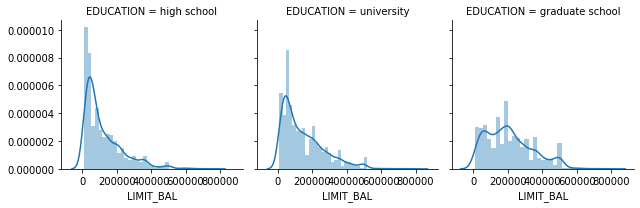

In [ ]:
#comparando as categorias em relação a coluna "LIMIT_BAL"
M = sns.FacetGrid(df, col="EDUCATION")
M.map(sns.distplot, 'LIMIT_BAL')
plt.show()

Esse Facegrid, assim como o das idades, mostra diferenças sensíveis relativas a diferentes níveis educacionais: pessoas com nível superior tendem a apresentar limites de crédito mais altos, enquanto pessoas que apenas completaram o ensino médio apresentam, majotitariamente, um limite de crédito menor.

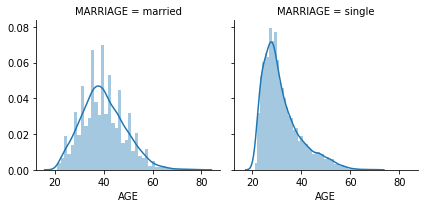

In [ ]:
M = sns.FacetGrid(df, col="MARRIAGE")
M.map(sns.distplot, "AGE")

Esses gráficos, por sua vez, não ajudam tanto o nosso problema, mas mostram claramente que, em nosso dataset, pessoas casadas costumam ser mais velhas que pessoas solteiras (apenas para mostrar mais uma funcionalidade desse tipo de abordagem).

# Considerações finais
Bom, chegamos ao fim do notebook, mas isso não significa que a análise acabou. No mundo da análise de dados, não existe uma receita secreta ou uma coisa pronta que sabe qual a melhor maneira de vizualizar seus dados e tirar insights. Então, sinta-se livre para explorar mais das diversas colunas desse dataset (temos várias), além de buscar mais relações entre elas. Note também que não foi realizada nenhuma análise direta da coluna default.payment.next.month, que indica se a fatura do próximo mês será ou não paga, portanto, se possível, dedique um tempo para analisar como as demais colunas influênciam na possibilidade de um indivíduo pagar suas contas ou não! Espero que tenham gostado ou entendido! Qualquer dúvida é so chamar no whats.